In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



df = pd.read_csv("fipezap_ipca.csv",sep=";", encoding='ISO-8859-1')
selic = pd.read_csv("selic.csv",sep=";")
df=df[df['Ano']>0]

In [37]:
# Criar uma coluna com o ano e o mês concatenados
df["Ano-Mês"] = df["Ano"].astype(str) + "-" + df["Mês"].astype(str)

# Converter a coluna Ano-Mês para formato de data
df["Ano-Mês"] = pd.to_datetime(df["Ano-Mês"], format="%Y-%m")


In [38]:

# Ordenar os dados pela coluna Ano-Mês
df = df.sort_values(by="Ano-Mês")



In [39]:

# Calcular a taxa de crescimento anual usando o método pct_change com períodos de 12 meses
df["Taxa de Crescimento Anual"] = df["Valor"].pct_change(periods=12)
# Calcular a taxa de crescimento anual usando o método pct_change com períodos de 12 meses
df["Taxa de Crescimento Anual 1D"] = df["Valor 1D"].pct_change(periods=12)
# Calcular a taxa de crescimento anual usando o método pct_change com períodos de 12 meses
df["Taxa de Crescimento Anual 2D"] = df["Valor 2D"].pct_change(periods=12)
# Calcular a taxa de crescimento anual usando o método pct_change com períodos de 12 meses
df["Taxa de Crescimento Anual 3D"] = df["Valor 3D"].pct_change(periods=12)
# Calcular a taxa de crescimento anual usando o método pct_change com períodos de 12 meses
df["Taxa de Crescimento Anual 4D"] = df["Valor 4D"].pct_change(periods=12)

In [40]:
# Criar uma coluna com o valor acumulado nos últimos 12 meses (ou 12 linhas) usando o método rolling com janela de 12 e função de produto
df["Valor Acumulado-ipca"] = df["Variação Mensal-ipca"].rolling(12).apply(lambda x: (1 + x/100).prod()) - 1

In [41]:
# Criar uma coluna com o ano e o mês concatenados
selic["Ano-Mês"] = selic["ano"].astype(str) + "-" + selic["mês"].astype(str)

# Converter a coluna Ano-Mês para formato de data
selic["Ano-Mês"] = pd.to_datetime(selic["Ano-Mês"], format="%Y-%m")

In [42]:
# Ordenar os dados pela coluna Ano-Mês
selic = selic.sort_values(by="Ano-Mês")


# Criar uma coluna com o valor acumulado nos últimos 12 meses (ou 12 linhas) usando o método rolling com janela de 12 e função de produto
selic["Valor Acumulado-selic"] = selic["selic"].rolling(12).apply(lambda x: (1 + x).prod()) - 1

# Mostrar as primeiras linhas do dataframe
selic.head(100)

selic=selic[selic['ano']>2007]

C:\Users\rpess\AppData\Local\Temp\ipykernel_5008\3578090071.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])


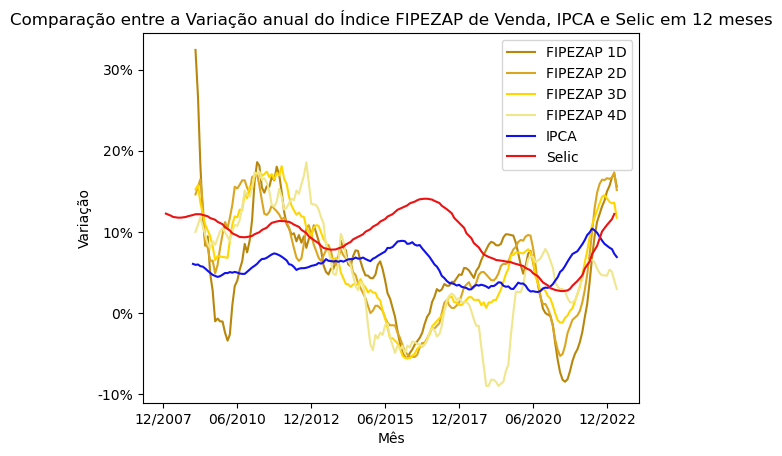

In [43]:

# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Plotar um gráfico de linha da taxa de crescimento anual por ano-mês
ax.plot(df["Ano-Mês"], df["Taxa de Crescimento Anual 1D"], label="FIPEZAP 1D", color="darkgoldenrod")
ax.plot(df["Ano-Mês"], df["Taxa de Crescimento Anual 2D"], label="FIPEZAP 2D", color="goldenrod")
ax.plot(df["Ano-Mês"], df["Taxa de Crescimento Anual 3D"], label="FIPEZAP 3D", color="gold")
ax.plot(df["Ano-Mês"], df["Taxa de Crescimento Anual 4D"], label="FIPEZAP 4D", color="khaki")

# Plotar um gráfico de linha da variação anual-ipca por ano-mês
ax.plot(df["Ano-Mês"], df["Valor Acumulado-ipca"], label="IPCA", color="#1111EE")

# Plotar um gráfico de linha da variação anual-ipca por ano-mês
ax.plot(selic["Ano-Mês"], selic["Valor Acumulado-selic"], label="Selic", color="#EE1111")

# Adicionar um título e rótulos aos eixos
ax.set_title("Comparação entre a Variação anual do Índice FIPEZAP de Venda, IPCA e Selic em 12 meses")
ax.set_xlabel("Mês")
ax.set_ylabel("Variação")

# Definir o formato dos rótulos do eixo x como apenas o valor do mês
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))

# Definir o intervalo dos rótulos do eixo x como a cada 6 meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=30))

# Definir o formato dos rótulos do eixo x como "mm/yyyy"
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%Y"))

# Definir o formato dos rótulos do eixo y como "%.0f%%"
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])

# Adicionar uma legenda ao gráfico
ax.legend()

# Mostrar o gráfico
plt.show()